Below is a code to find the the Pearson Correlation for 3 given dataset. We use the 'np.corrcoef' function provided in the numpy library. This produces the relevant correlation coefficients and are extracted from the correlation matrix using their index.

In [22]:
import numpy as np

# Given data
x1 = np.array([12, 8, 9, 9, 11, 9, 8, 11, 10, 11])
x2 = np.array([4, 7, 5, 6, 4, 6, 7, 5, 5, 4])
x3 = np.array([1, 4, 3, 3, 1, 2, 4, 1, 2, 1])


cor_x1_x2 = np.corrcoef(x1, x2)[0, 1]
cor_x1_x3 = np.corrcoef(x1, x3)[0, 1]
cor_x2_x3 = np.corrcoef(x2, x3)[0, 1]

print("Correlation between x1 and x2:", cor_x1_x2)
print("Correlation between x1 and x3:", cor_x1_x3)
print("Correlation between x2 and x3:", cor_x2_x3)


Correlation between x1 and x2: -0.9182390948504622
Correlation between x1 and x3: -0.9436850342409099
Correlation between x2 and x3: 0.8886744866475456


In [29]:

x1 = np.array([12, 8, 9, 9, 11, 9, 8, 11, 10, 11])
x2 = np.array([4, 7, 5, 6, 4, 6, 7, 5, 5, 4])
x3 = np.array([1, 4, 3, 3, 1, 2, 4, 1, 2, 1])


ranked_x1 = rankdata(x1)
ranked_x2 = rankdata(x2)
ranked_x3 = rankdata(x3)


print("Ranked version of x1:", ranked_x1)
print("Ranked version of x2:", ranked_x2)
print("Ranked version of x3:", ranked_x3)


Ranked version of x1: [10.   1.5  4.   4.   8.   4.   1.5  8.   6.   8. ]
Ranked version of x2: [2.  9.5 5.  7.5 2.  7.5 9.5 5.  5.  2. ]
Ranked version of x3: [2.5 9.5 7.5 7.5 2.5 5.5 9.5 2.5 5.5 2.5]


## **Below is the method without using the 'rankdata' function. This is called hardcoding :)**

In [34]:
import numpy as np

x1 = np.array([12, 8, 9, 9, 11, 9, 8, 11, 10, 11])
x2 = np.array([4, 7, 5, 6, 4, 6, 7, 5, 5, 4])
x3 = np.array([1, 4, 3, 3, 1, 2, 4, 1, 2, 1])


def calculate_average_ranks(arr):
    ranked_array = np.empty_like(arr, dtype=float)
    sorted_indices = np.argsort(arr)
    group_count = 1
    current_rank_sum = 1

    for i in range(1, len(sorted_indices)):
        if arr[sorted_indices[i]] == arr[sorted_indices[i - 1]]:
            group_count += 1
            current_rank_sum += i + 1
        else:
            average_rank = round(current_rank_sum / group_count)
            for j in range(i - group_count, i):
                ranked_array[sorted_indices[j]] = average_rank
            group_count = 1
            current_rank_sum = i + 1


    if group_count > 1:
        average_rank = round(current_rank_sum / group_count)
        for j in range(len(sorted_indices) - group_count, len(sorted_indices)):
            ranked_array[sorted_indices[j]] = average_rank
    else:
        ranked_array[sorted_indices[-1]] = len(sorted_indices)

    return ranked_array


rank_x1 = calculate_average_ranks(x1)
rank_x2 = calculate_average_ranks(x2)
rank_x3 = calculate_average_ranks(x3)


print("Average Ranks for x1:", rank_x1)
print("Average Ranks for x2:", rank_x2)
print("Average Ranks for x3:", rank_x3)


Average Ranks for x1: [10.  2.  4.  4.  8.  4.  2.  8.  6.  8.]
Average Ranks for x2: [ 2. 10.  5.  8.  2.  8. 10.  5.  5.  2.]
Average Ranks for x3: [ 2. 10.  8.  8.  2.  6. 10.  2.  6.  2.]


In [24]:

pearson_x1_x2 = np.corrcoef(x1, x2)[0, 1]
pearson_x1_x3 = np.corrcoef(x1, x3)[0, 1]
pearson_x2_x3 = np.corrcoef(x2, x3)[0, 1]

spearman_x1_x2, _ = spearmanr(x1, x2)
spearman_x1_x3, _ = spearmanr(x1, x3)
spearman_x2_x3, _ = spearmanr(x2, x3)


print("Pearson correlation between x1 and x2:", pearson_x1_x2)
print("Pearson correlation between x1 and x3:", pearson_x1_x3)
print("Pearson correlation between x2 and x3:", pearson_x2_x3)

print("\nSpearman correlation between x1 and x2:", spearman_x1_x2)
print("Spearman correlation between x1 and x3:", spearman_x1_x3)
print("Spearman correlation between x2 and x3:", spearman_x2_x3)


Pearson correlation between x1 and x2: -0.9182390948504622
Pearson correlation between x1 and x3: -0.9436850342409099
Pearson correlation between x2 and x3: 0.8886744866475456

Spearman correlation between x1 and x2: -0.9260498033115712
Spearman correlation between x1 and x3: -0.9611200169123425
Spearman correlation between x2 and x3: 0.886035790896973


In [25]:
data_matrix = np.vstack((x1, x2, x3))

covariance_matrix = np.cov(data_matrix)

print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
[[ 1.95555556 -1.48888889 -1.62222222]
 [-1.48888889  1.34444444  1.26666667]
 [-1.62222222  1.26666667  1.51111111]]


In [36]:
cov_matrix = np.array([[1.0, 0.8], [0.8, 1.0]])

# We now use the numpy's library of modules and take the module 'eig' specificlay to calculate the eigen values and eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
# The above code stores the eigen value and the eigen vector to the two variables respectively

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[1.8 0.2]

Eigenvectors:
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


The dataset is represented by arrays x1 and x2. After constructing the data matrix and calculating its covariance matrix, the eigenvectors of the covariance matrix, which represent the principal directions of maximum variance in the data, are obtained. These eigenvectors are then scaled for better visualization and plotted as red arrows on the scatter plot, starting from the mean of the data. The resulting plot provides insights into the primary directions of variability in the dataset.

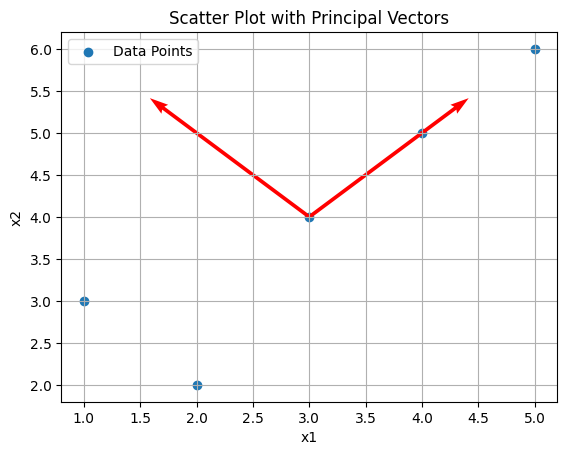

In [28]:
import matplotlib.pyplot as plt


x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([3, 2, 4, 5, 6])


plt.scatter(x1, x2, label='Data Points')

# We now construct the data matrix by stacking variables vertically and transpose them
data = np.vstack((x1, x2)).T

# calculating the covariance nwo
cov_matrix = np.cov(data, rowvar=False)

# We now throw away eigenvalues as we no longer use them
_, principal_vectors = np.linalg.eig(cov_matrix)


scale_factor = 2
scaled_principal_vectors = principal_vectors * scale_factor

# We use the quiver plot is used to visually represent the principal vectors (eigenvectors) as arrows on the scatter plot, illustrating the directions of maximum variance in the two-dimensional dataset.
origin = np.mean(data, axis=0)
for vector in scaled_principal_vectors.T:
    plt.quiver(*origin, *vector, color='red', scale=1, scale_units='xy', angles='xy')


plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Scatter Plot with Principal Vectors')
plt.legend()


plt.grid(True)
plt.show()